In [1]:
%matplotlib inline
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

from experiment1 import Autoencoder, to_img

In [2]:
batch_size = 32

# Load data
img_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

dataset = MNIST('../data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Load model
model = Autoencoder()
model_state = torch.load('../conv_autoencoder.pth')
model.load_state_dict(model_state)

In [3]:
data_iterator = dataloader.__iter__()
batch = next(data_iterator)

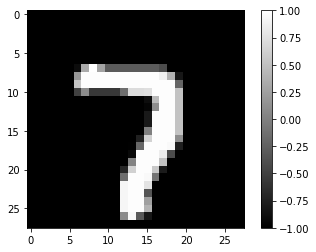

In [4]:
image, label = batch

plt.imshow(image[0, 0], cmap='gray')
plt.colorbar()

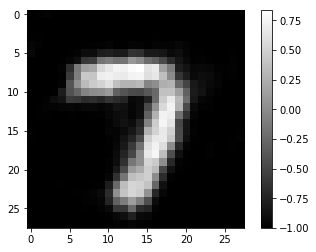

In [5]:
latent, reconst = model(image)
latent = latent.detach().numpy()
reconst = reconst.detach().numpy()

plt.imshow(reconst[0, 0], cmap='gray')
plt.colorbar()

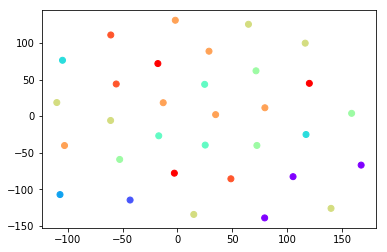

In [6]:
tsne = TSNE()
transformed = tsne.fit_transform(latent)
color_mapping = matplotlib.cm.rainbow(np.linspace(0, 1, 10))
colors = [color_mapping[cl] for cl in label]
plt.scatter(transformed[:, 0], transformed[:, 1], c=colors)